In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud=pd.read_csv(r'D:\data science\data science assg\ass.14 Decision Trees\Fraud_Check.csv')

In [4]:
tax = []
for i in fraud['Taxable.Income']:
    if i <= 30000:
        tax.append('Risky')
    else:
        tax.append('Good')
    
tax

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [5]:
taxable = pd.Series(tax)

In [6]:
fraud2 = pd.concat([fraud, taxable], axis =1)
fraud2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,0
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
fraud2['Taxable'] = fraud2[0]
fraud2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,0,Taxable
0,NO,Single,68833,50047,10,YES,Good,Good
1,YES,Divorced,33700,134075,18,YES,Good,Good
2,NO,Married,36925,160205,30,YES,Good,Good
3,YES,Single,50190,193264,15,YES,Good,Good
4,NO,Married,81002,27533,28,NO,Good,Good
...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good,Good
596,YES,Divorced,69967,55369,2,YES,Good,Good
597,NO,Divorced,47334,154058,0,YES,Good,Good
598,YES,Married,98592,180083,17,NO,Good,Good


In [8]:
label_encoder = preprocessing.LabelEncoder()
fraud2['Taxable'] = label_encoder.fit_transform(fraud2['Taxable'])
fraud3 = fraud2.drop(0, axis =1)
fraud3 = fraud2.drop('Taxable.Income', axis =1)
fraud3

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,0,Taxable
0,NO,Single,50047,10,YES,Good,0
1,YES,Divorced,134075,18,YES,Good,0
2,NO,Married,160205,30,YES,Good,0
3,YES,Single,193264,15,YES,Good,0
4,NO,Married,27533,28,NO,Good,0
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good,0
596,YES,Divorced,55369,2,YES,Good,0
597,NO,Divorced,154058,0,YES,Good,0
598,YES,Married,180083,17,NO,Good,0


In [9]:
fraud4 = pd.get_dummies(fraud3)
fraud4

,City.Population,Work.Experience,Taxable,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,0_Good,0_Risky
0,50047,10,0,1,0,0,0,1,0,1,1,0
1,134075,18,0,0,1,1,0,0,0,1,1,0
2,160205,30,0,1,0,0,1,0,0,1,1,0
3,193264,15,0,0,1,0,0,1,0,1,1,0
4,27533,28,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,0,1,1,0,0,0,1,1,0
596,55369,2,0,0,1,1,0,0,0,1,1,0
597,154058,0,0,1,0,1,0,0,0,1,1,0
598,180083,17,0,0,1,0,1,0,1,0,1,0


In [10]:
X = fraud4.drop('Taxable', axis =1)
y = fraud4['Taxable']

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 100)

# CART

In [12]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [13]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
model_gini.score(X_test,y_test)

1.0

In [16]:
pred = model_gini.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

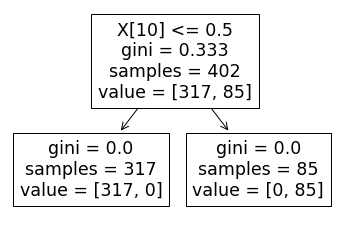

In [17]:
tree.plot_tree(model_gini);